<a href="https://colab.research.google.com/github/ADRIANVM117/proyectos_propios/blob/main/mini_proyectos/spotify_advm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spotify Music Data
This dataset consists of ~600 songs that were in the top songs of the year from 2010 to 2019 (as measured by Billboard). You can explore interesting song data pulled from [Spotify](http://organizeyourmusic.playlistmachinery.com/#) such as the beats per minute, amount of spoken words, loudness, and energy of every song. 

Not sure where to begin? Scroll to the bottom to find challenges!

In [87]:
import pandas as pd

df = pd.read_csv("/content/spotify_top_music.csv", index_col=0)
df

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


## Data dictionary

|    | Variable   | Explanation                                                |
|---:|:-----------|:-----------------------------------------------------------|
|  0 | title      | The title of the song                                      |
|  1 | artist     | The artist of the song                                     |
|  2 | top genre  | The genre of the song                                      |
|  3 | year       | The year the song was in the Billboard                     |
|  4 | bpm        | Beats per minute: the tempo of the song                    |
|  5 | nrgy       | The energy of the song: higher values mean more energetic (fast, loud)  |
|  6 | dnce       | The danceability of the song: higher values mean it's easier to dance to  |
|  7 | dB         | Decibel: the loudness of the song  |
|  8 | live       | Liveness: likeliness the song was recorded with a live audience  |
|  9 | val        | Valence: higher values mean a more positive sound (happy, cheerful) |
| 10 | dur        | The duration of the song |
| 11 | acous      | The acousticness of the song: likeliness the song is acoustic|
| 12 | spch       | Speechines: higher values mean more spoken words |
| 13 | pop        | Popularity: higher values mean more popular|

[Source](https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year) of dataset.

## Don't know where to start? 

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: Which artists and genres are the most popular?
- 📊 **Visualize**: Visualize the numeric values as a time-series by year. Can you spot any changes over the years?
- 🔎 **Analyze**: Train and build a classifier to predict a song's genre based on columns 3 to 13.

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

Your friend, who is an aspiring musician, wants to make a hit song and has asked you to use your data skills to help her. You have decided to analyze what makes a top song, keeping in mind changes over the years. What concrete recommendations can you give her before she writes lyrics, makes beats, and records the song? She's open to any genre!

You will need to prepare a report that is accessible to a broad audience. It will need to outline your motivation, analysis steps, findings, and conclusions.

---

✍️ _If you have an idea for an interesting Scenario or Challenge, or have feedback on our existing ones, let us know! You can submit feedback by pressing the question mark in the top right corner of the screen and selecting "Give Feedback". Include the phrase "Content Feedback" to help us flag it in our system._

In [88]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


## Exploratory 

In [89]:
df.isnull().sum()

title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

In [90]:
df.dtypes

title        object
artist       object
top genre    object
year          int64
bpm           int64
nrgy          int64
dnce          int64
dB            int64
live          int64
val           int64
dur           int64
acous         int64
spch          int64
pop           int64
dtype: object

### what genre contains more songs?

In [91]:
print(df['top genre'].value_counts())
print('\n')
print(df['top genre'].value_counts(normalize = True))

dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
art pop                        8
complextro                     6
hip pop                        6
australian dance               6
atl hip hop                    5
australian pop                 5
edm                            5
permanent wave                 4
latin                          4
hip hop                        4
colombian pop                  3
tropical house                 3
brostep                        2
downtempo                      2
electronic trap                2
belgian edm                    2
escape room                    2
folk-pop                       2
electro                        2
indie pop                      2
detroit hi

### general features of dance pop 

In [92]:
dance_pop = df[df['top genre'] == 'dance pop']

print('The average bpm is \t{:.3f} seconds'.format(dance_pop.bpm.mean()))
print('The average duration \t{:.3f} seconds ---> 3.74 minutes '.format(dance_pop.dur.mean()))
print('The average dance \t{:.3f}   points '.format(dance_pop.dnce.mean()))
print('The average energy \t{:.3f}   points '.format(dance_pop.nrgy.mean()))

The average bpm is 	118.486 seconds
The average duration 	224.609 seconds ---> 3.74 minutes 
The average dance 	65.972   points 
The average energy 	72.826   points 


# 🗺️ Explore: Which artists and genres are the most popular?

In [93]:
artis_and_genres = df.loc[:,['artist'	,'top genre', 'pop'	]]
artis_and_genres.head()

,artist,top genre,pop
1,Train,neo mellow,83
2,Eminem,detroit hip hop,82
3,Kesha,dance pop,80
4,Lady Gaga,dance pop,79
5,Bruno Mars,pop,78


### Most popular artist 

In [94]:
artis_and_genres.sort_values(by=['pop'],  ascending=False)

,artist,top genre,pop
573,Maroon 5,pop,99
574,Selena Gomez,dance pop,97
575,Lewis Capaldi,pop,96
576,Shawn Mendes,canadian pop,95
577,Sam Smith,pop,93
...,...,...,...
51,Martin Solveig,big room,0
363,Fergie,dance pop,0
443,Adele,british soul,0
139,P!nk,dance pop,0


### Artis with more hits on spotify

In [95]:
artis_and_genres['artist'].value_counts()

Katy Perry             17
Justin Bieber          16
Rihanna                15
Maroon 5               15
Lady Gaga              14
                       ..
Iggy Azalea             1
5 Seconds of Summer     1
Michael Jackson         1
Disclosure              1
Daddy Yankee            1
Name: artist, Length: 184, dtype: int64

- katy perry is the singer with more hits on spotify, the secon one is justin bieber, the third rihanna

### the most popular genre. 

- for this task i decided to add up all the scores from the 'pop' column and group them by genre, the highest score is the most popular. 

- the most popular artist is maroon 5 

In [96]:
genres =artis_and_genres.groupby('top genre').sum()
sort_genres = genres.sort_values(['pop'], ascending = False)
sort_genres.iloc[0:5]

,pop
top genre,
dance pop,21047
pop,4490
canadian pop,2456
boy band,1045
electropop,1007


- most popular genres are: 
   - dance pop 21047
   - pop	4490
   - canadian pop	2456
   - boy band	1045
   - electropop	1007
   - barbadian pop

# 📊 Visualize: Visualize the numeric values as a time-series by year. Can you spot any changes over the years?

In [97]:
df['año'] = df['year']
# i set the 'year' as a new index to manage visualitations  more eficiently
df.set_index('año', inplace=True)
df

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
año,,,,,,,,,,,,,,
2010,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2010,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2010,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
2010,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
2010,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
2019,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
2019,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70


In [98]:
df

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
año,,,,,,,,,,,,,,
2010,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2010,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2010,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
2010,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
2010,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
2019,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
2019,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70


### top 5 of popular genres through years

In [112]:
dpop = df[df['top genre'] == 'dance pop'] 
dpop.groupby('year')['pop'].sum()

year
2010    2017
2011    2265
2012     964
2013    2625
2014    1615
2015    3186
2016    2985
2017    2076
2018    2752
2019     562
Name: pop, dtype: int64

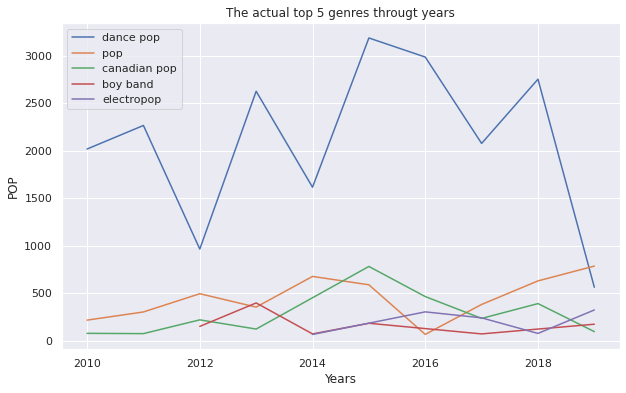

In [120]:
# lista = ['dance pop','pop','canadian pop','boy band','electropop']

dancepop = df[df['top genre'] == 'dance pop'] 
dancepopyears = dancepop.groupby(dancepop.index).pop.sum()
pop = df[df['top genre'] == 'pop'] 
popyears = pop.groupby(pop.index).pop.sum()
canadianpop = df[df['top genre'] == 'canadian pop'] 
canadianpopyears = canadianpop.groupby(canadianpop.index).pop.sum()
boyband = df[df['top genre'] == 'boy band'] 
boybandyears = boyband.groupby(boyband.index).pop.sum()
electropop = df[df['top genre'] == 'electropop'] 
electropopyears = electropop.groupby(electropop.index).pop.sum()

# plot
sns.set()
plt.figure(figsize = (10,6))
dancepopyears.plot()
popyears.plot()
canadianpopyears.plot()
boybandyears.plot()
electropopyears.plot()
plt.xlabel('Years')
plt.ylabel('POP')
plt.title('The actual top 5 genres througt years')
plt.legend(['dance pop','pop','canadian pop','boy band','electropop'])

# NOTES

- The genre with the most songs is dance pop : 327 songs (54% from dataset)
    - The average bpm is 	118.486 seconds
    - The average duration 	224.609 seconds ---> 3.74 minutes 
    - The average dance 	65.972   points 
    - The average energy 	72.826   points 

- the second one is pop: 60 songs (.9% from dataset)


- The most popular artist is maroon 5